In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter("ignore")

pd.options.display.max_columns = 85
pd.options.display.max_rows = 1000
%matplotlib inline



In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

There are 1460 instances of traning data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
def cat_imputation(column,value,dataset):
    dataset.loc[dataset[column].isnull(),column] = value

In [5]:
train[train['SalePrice'].isnull()].Id.count()

0

In [6]:
#Checking for missing data
def check_missing():
    NAs = pd.concat([train.drop('SalePrice',axis=1).isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
    NAs.sort_values(by=['Train','Test'],inplace=True,ascending=False)
    NAs = NAs[NAs.sum(axis=1) > 0]
    return NAs

In [7]:
check_missing()

,Train,Test
PoolQC,1453,1456
MiscFeature,1406,1408
Alley,1369,1352
Fence,1179,1169
FireplaceQu,690,730
LotFrontage,259,227
GarageYrBlt,81,78
GarageFinish,81,78
GarageQual,81,78
GarageCond,81,78


In [8]:
def missing_plot(dataset):
    missing = dataset.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    print(missing)
    fig,ax = plt.subplots(figsize=(18,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Missing Values',fontsize=20)
    missing.plot.bar()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


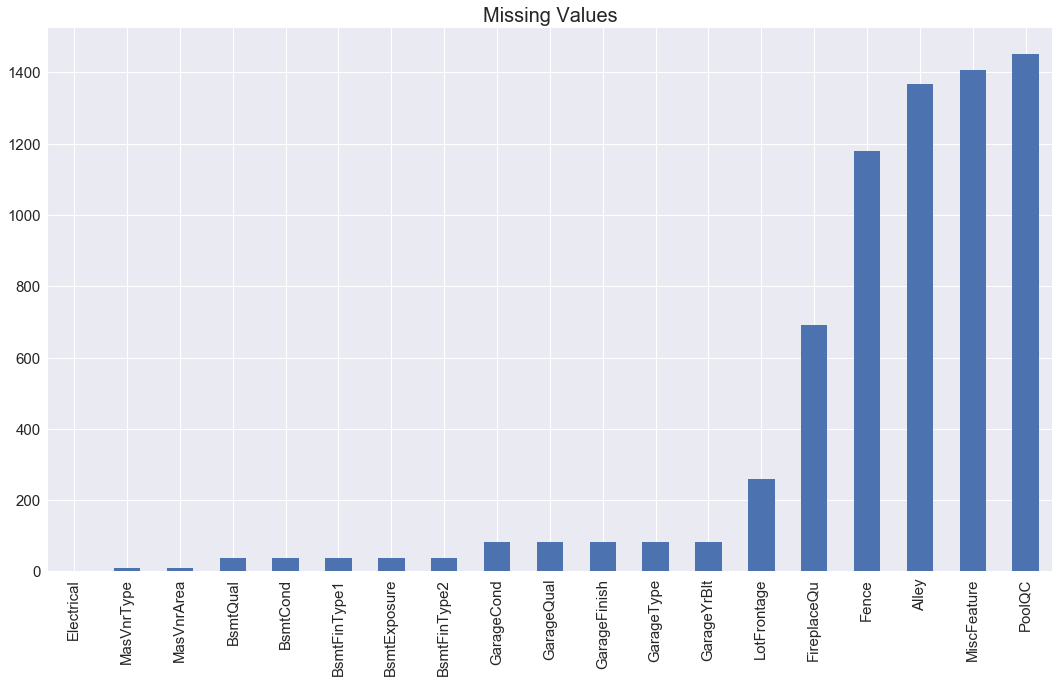

In [9]:
missing_plot(train)

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


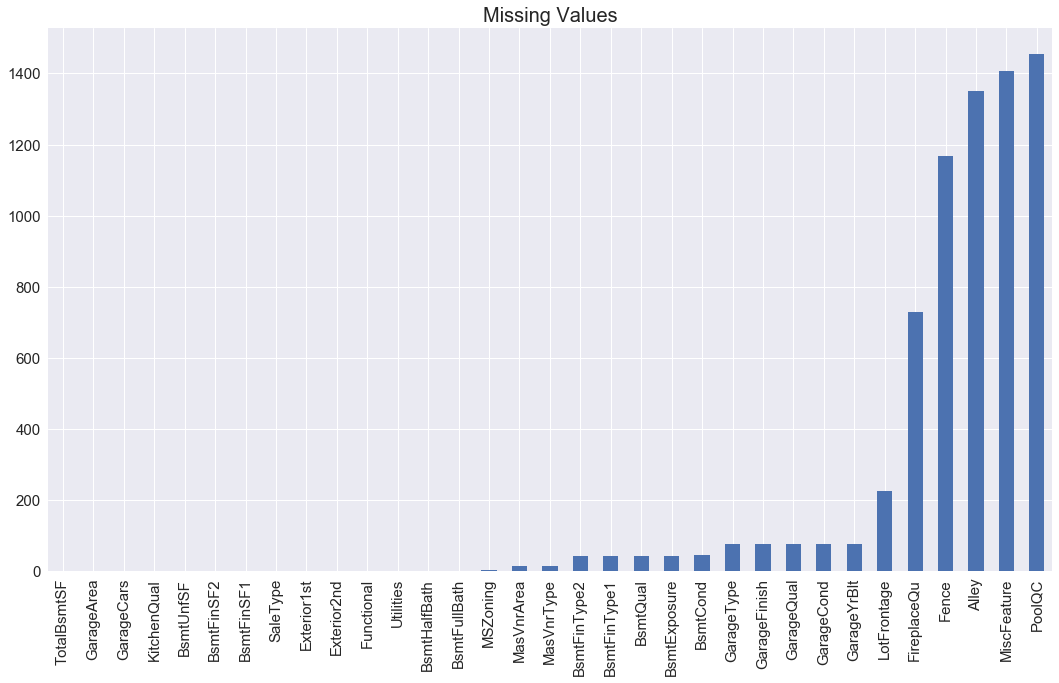

In [10]:
missing_plot(test)

19 attributes have missing values, 5 over 50% of all data. 

Most of times NA means lack of subject described by attribute.

In [11]:
Garage_index = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']
train[Garage_index][train['GarageType'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [12]:
test[Garage_index][test['GarageQual'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
71,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
92,NaN,NaN,NaN,NaN,NaN,0.0,0.0
96,NaN,NaN,NaN,NaN,NaN,0.0,0.0
98,NaN,NaN,NaN,NaN,NaN,0.0,0.0
100,NaN,NaN,NaN,NaN,NaN,0.0,0.0
130,NaN,NaN,NaN,NaN,NaN,0.0,0.0
133,NaN,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,NaN,0.0,0.0


GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
           NA	No Garage


GarageFinish: Interior finish of the garage

           Fin	Finished
           RFn	Rough Finished	
           Unf	Unfinished
           NA	No Garage


In [13]:
train['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [14]:
# Garage Imputation
for s in [train,test]:
    for cols in Garage_index:
        if s[cols].dtype == np.object:
            cat_imputation(cols,'None',s)
        else:
            cat_imputation(cols,0,s)

In [15]:
train['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
train['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [17]:
train['PoolArea'].value_counts(dropna=False)

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [18]:
cat_imputation('PoolQC','None',train)
cat_imputation('PoolQC','None',test)

In [19]:
train['PoolQC'].value_counts(dropna=True)

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [20]:
cat_imputation('MiscFeature','None',train)
cat_imputation('MiscFeature','None',test)

In [21]:
train['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [22]:
cat_imputation('Fence','None',train)
cat_imputation('Fence','None',test)

In [23]:
train['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [24]:
cat_imputation('Alley','None',train)
cat_imputation('Alley','None',test)

In [25]:
for s in [train,test]:
    for cols in ['BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual']:
        cat_imputation(cols,'None',s)

In [26]:
train['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [27]:
cat_imputation('FireplaceQu','None',train)
cat_imputation('FireplaceQu','None',test)

In [28]:
cat_imputation('MasVnrType','None',train)
cat_imputation('MasVnrType','None',test)

cat_imputation('MasVnrArea',0,train)
cat_imputation('MasVnrArea',0,test)

In [29]:
check_missing()

,Train,Test
LotFrontage,259,227
Electrical,1,0
MSZoning,0,4
Utilities,0,2
BsmtFullBath,0,2
BsmtHalfBath,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
BsmtFinSF1,0,1


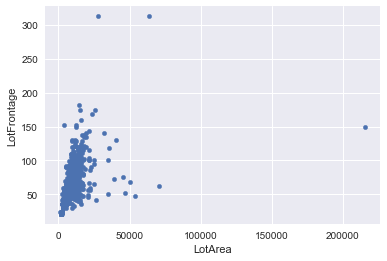

In [30]:
data = pd.concat([train['LotArea'],train['LotFrontage']],axis=1)
#     print(data.head(10))
data.plot.scatter(x='LotArea',y='LotFrontage')


In [31]:
train.loc[train['LotFrontage'].isnull(),'LotArea'].describe()

count       259.000000
mean      13137.370656
std       16215.264451
min        1974.000000
25%        8065.500000
50%       10624.000000
75%       13018.500000
max      164660.000000
Name: LotArea, dtype: float64

In [32]:
train.loc[train['LotFrontage'].isnull(),'LotShape'].value_counts(dropna=False)

IR1    167
Reg     74
IR2     15
IR3      3
Name: LotShape, dtype: int64

In [33]:
train.loc[train['LotFrontage'].isnull(),'LotConfig'].value_counts(dropna=False)

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [34]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

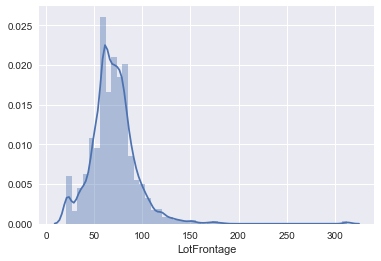

In [35]:
sns.distplot(train['LotFrontage'].dropna())

right skewed

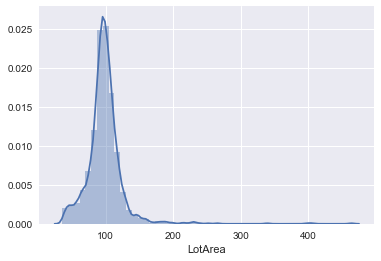

In [36]:
sns.distplot(np.sqrt(train['LotArea']).dropna())

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet


In [37]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
print(train['LotFrontage'].corr(train['LotArea']))
print(train['LotFrontage'].corr(train['SqrtLotArea']))



0.426095018772
0.602002216794


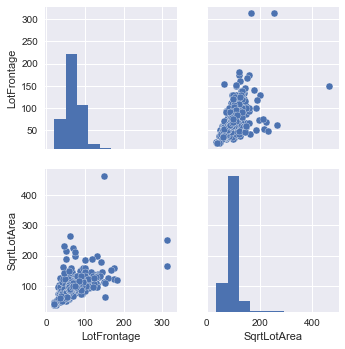

In [38]:
sns.pairplot(train[['LotFrontage','SqrtLotArea']].dropna())

In [39]:
cond = train['LotFrontage'].isnull()
train.LotFrontage[cond] = train.SqrtLotArea[cond]

In [40]:
del train['SqrtLotArea']

In [41]:
cond = test['LotFrontage'].isnull()
test.LotFrontage[cond] = np.sqrt(test.LotArea[cond])

In [42]:
check_missing()

,Train,Test
Electrical,1,0
MSZoning,0,4
Utilities,0,2
BsmtFullBath,0,2
BsmtHalfBath,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
BsmtFinSF1,0,1
BsmtFinSF2,0,1


In [43]:
train['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [44]:
cat_imputation('Electrical','SBrkr',train)
cat_imputation('Electrical','SBrkr',test)

In [45]:
check_missing()

,Train,Test
MSZoning,0,4
Utilities,0,2
BsmtFullBath,0,2
BsmtHalfBath,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
BsmtFinSF1,0,1
BsmtFinSF2,0,1
BsmtUnfSF,0,1


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
        A	Agriculture
        C	Commercial
       FV	Floating Village Residential
        I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [46]:
pd.DataFrame(test.loc[test['MSZoning'].isnull(),'MSSubClass'])

,MSSubClass
455,30
756,20
790,70
1444,20


In [47]:
pd.crosstab(index = train['MSSubClass'],columns = train['MSZoning'])

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,2,13,3,508,10
30,2,0,1,33,33
40,0,0,0,2,2
45,0,0,1,4,7
50,4,0,1,88,51
60,0,25,0,273,1
70,1,0,3,30,26
75,0,0,0,6,10
80,0,0,0,58,0


In [48]:
pd.crosstab(index = test['MSSubClass'],columns = test['MSZoning'])

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,1,21,1,508,10
30,6,0,1,28,34
40,0,0,0,2,0
45,0,0,0,2,4
50,3,0,1,71,68
60,0,18,0,256,2
70,3,0,0,27,37
75,0,0,0,3,4
80,0,0,0,57,3


In [49]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [50]:
cat_imputation('MSZoning','RL',test)

In [51]:
missing_Bsmt = test[test['BsmtFullBath'].isnull()].filter(like='Bsmt',axis=1)
missing_Bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
660,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
728,None,None,None,None,0.0,None,0.0,0.0,0.0,NaN,NaN


In [52]:
for e in missing_Bsmt.columns:
    if test[e].dtype == np.object:
        cat_imputation(e,'None',s)
    else:
        cat_imputation(e,0,s)
    

In [53]:
check_missing()

,Train,Test
Utilities,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
KitchenQual,0,1
SaleType,0,1


In [54]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [55]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [56]:
del train['Utilities']
del test['Utilities']

In [57]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [58]:
test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [59]:
cat_imputation('Functional','Typ',test)

In [60]:
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [61]:
train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [62]:
test[['Exterior1st','Exterior2nd']][test['Exterior1st'].isnull()]

,Exterior1st,Exterior2nd
691,NaN,NaN


In [63]:
test.loc[test['Exterior1st'].isnull(), 'Exterior1st'] = 'VinylSd'
test.loc[test['Exterior2nd'].isnull(), 'Exterior2nd'] = 'VinylSd'

In [64]:
cat_imputation('KitchenQual','TA',test)
cat_imputation('SaleType','WD',test)

In [65]:
NAs = check_missing()
NAs.count()

Train    0
Test     0
dtype: int64

In [68]:
train.to_csv('train_nomiss.csv',index=False)

In [69]:
test.to_csv('test_nomiss.csv',index=False)